#Reading the DataSet

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [15]:
df=pd.read_csv("/content/digit_svm (1).csv")

In [16]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,0].values

In [18]:
x

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [19]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [20]:
x.shape

(42000, 784)

In [21]:
import matplotlib
import matplotlib.pyplot as plt

In [22]:
some_digit = x[36000]
some_digit_image = some_digit.reshape(28,28)

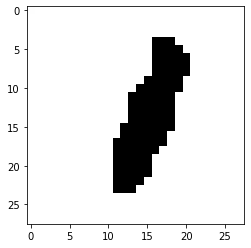

In [23]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

In [24]:
y[36000]

1

#splitting the data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [27]:
x_test.shape

(8400, 784)

#Scaling the Data

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()

In [30]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [31]:
x_test.shape

(8400, 784)

#Building ANN

In [32]:
ann = tf.keras.models.Sequential()

In [33]:
ann.add(tf.keras.layers.Dense(units=784, activation="relu"))

In [34]:
ann.add(tf.keras.layers.Dense(units=784, activation="relu"))

In [35]:
ann.add(tf.keras.layers.Dense(units=10, activation="sigmoid"))

#Compiling ANN

In [36]:
ann.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
ann.fit(x_train, y_train,batch_size=28, epochs=20)

Epoch 1/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.2406 - accuracy: 0.9371
Epoch 2/20
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0898 - accuracy: 0.9757
Epoch 3/20
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0728 - accuracy: 0.9822
Epoch 4/20
1200/1200 [==============================] - 19s 15ms/step - loss: 0.0539 - accuracy: 0.9862
Epoch 5/20
1200/1200 [==============================] - 19s 15ms/step - loss: 0.0556 - accuracy: 0.9877
Epoch 6/20
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0479 - accuracy: 0.9884
Epoch 7/20
1200/1200 [==============================] - 18s 15ms/step - loss: 0.0428 - accuracy: 0.9911
Epoch 8/20
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0500 - accuracy: 0.9910
Epoch 9/20
1200/1200 [==============================] - 19s 15ms/step - loss: 0.0354 - accuracy: 0.9927
Epoch 10/20
1200/1200 [==============================] - 19s 16m

In [38]:
loss, accuracy = ann.evaluate(x_test,y_test)

263/263 [==============================] - 2s 6ms/step - loss: 0.3366 - accuracy: 0.9864


In [39]:
y_pred = ann.predict(x_test)

In [41]:
y_pred = y_pred>0.5

In [42]:
y_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False,  True],
       ...,
       [False,  True,  True, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [43]:
y_test

array([3, 6, 9, ..., 2, 7, 2])

In [45]:
accuracy*100

98.64285588264465